# TSA Assignment 1
# Rishika Tibrewal, MDS202135

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARMA

import warnings
warnings.filterwarnings('ignore')

## 1) MA(1) Process

$x_t=10+ w_t+0.7 w_{t-1}$

$w_t\sim N(0,1)$


$\rho_0=1$ \\
$\rho_1=\dfrac{0.7}{1+(0.7)^2}= 0.469798$ \\
$\rho_i= 0 \hspace{1cm} ∀ \hspace{0.2cm} i>1$

### Calculating and plotting the theoritical ACF

In [2]:
rho=[]
rho=[1,0.7/((1+(0.7)**2))]
for i in range(2,21):
  rho.append(0)

In [3]:
print(rho)

[1, 0.4697986577181208, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


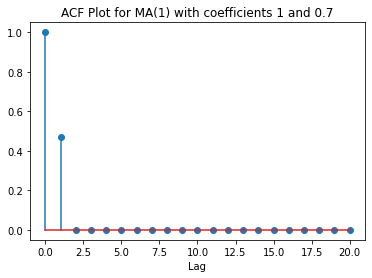

In [4]:
plt.stem(rho)
plt.title("ACF Plot for MA(1) with coefficients 1 and 0.7")
plt.xlabel("Lag")
plt.show()

### Generating 100 values from MA(1), plotting simulated data and its ACF

In [5]:
# Generating 100 sample points from MA(1) process with mentioned coefficients
sim_ma = ArmaProcess([1], [1,0.7]).generate_sample(nsample=100) 
sim_ma=sim_ma+[10]*100

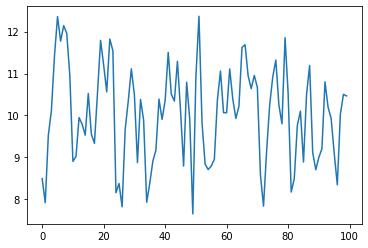

In [6]:
plt.plot(sim_ma)
plt.show()

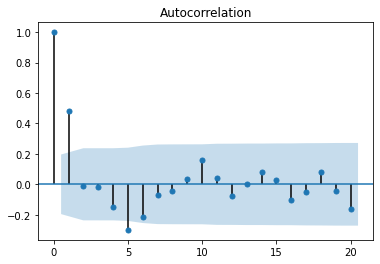

In [7]:
# ACF Plot
p=plot_acf(sim_ma, lags=20)
p.show()

Theoretically, in a MA(1) process, the first 2 value of autocorrelations, $\rho_i$ , $i=0,1$ , are significantly different from 0, but for $i>1$ , the autocorrelations are not significantly diffferent from 0. The graph agrees with the same for simulated values from MA(1). 

### Generating 2 sample sets from MA(1) of different sizes, here 500 and 1000

In [8]:
sim_ma_1 = ArmaProcess([1], [1,0.7]).generate_sample(nsample=500)
sim_ma_1=sim_ma_1+[10]*500

In [9]:
sim_ma_2 = ArmaProcess([1], [1,0.7]).generate_sample(nsample=1000)
sim_ma_2=sim_ma_2+[10]*1000

In [10]:
pd.DataFrame(sim_ma_2).to_csv('MA(1) Data.csv')

### Comparing the simulated data from both MA(1) processes and comparing their ACF

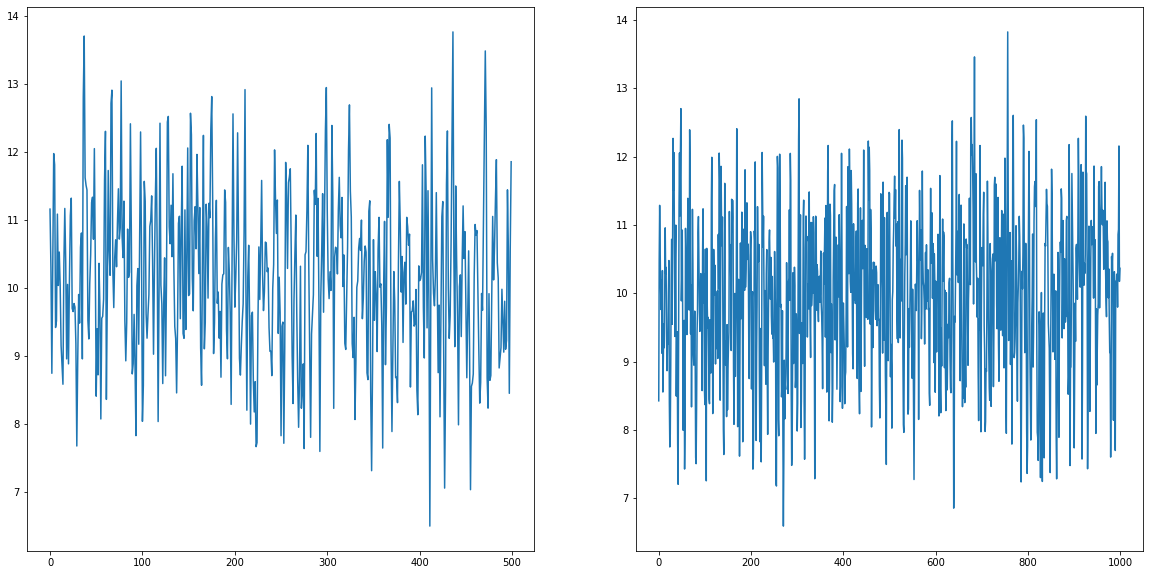

In [11]:
fig, axs = plt.subplots(1, 2,figsize=(20,10))
axs[0].plot(sim_ma_1)
axs[1].plot(sim_ma_2)
plt.show()

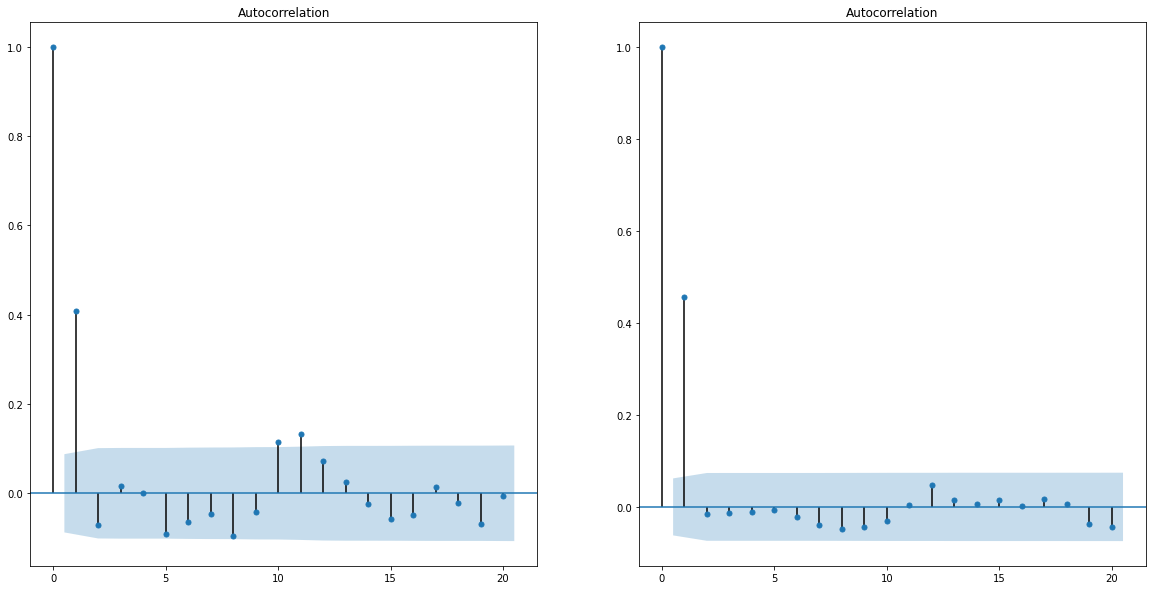

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
sm.graphics.tsa.plot_acf(sim_ma_1, lags=20, ax=ax[0])
sm.graphics.tsa.plot_acf(sim_ma_2, lags=20, ax=ax[1])
plt.show()

As mentioned above, in a MA(1) process, the first 2 value of autocorrelations, $\rho_i$ , $i=0,1$ , are significantly different from 0, but for $i>1$ , the autocorrelations are not significantly diffferent from 0. Both these graph agree with the same. 

## 2) MA(2) Process

$x_t=10+ w_t+0.5 w_{t-1} + 0.3 w_{t-2}$

$w_t\sim N(0,1)$


$\rho_0=1$ \\
$\rho_1=\dfrac{0.5 + (0.3)(0.5)}{1+(0.5)^2 + (0.3)^2}=0.485074$ \\
$\rho_1=\dfrac{0.3}{1+(0.5)^2 + (0.3)^2}=0.22388$ \\
$\rho_i= 0 \hspace{1cm} ∀ \hspace{0.2cm} i>2$

### Calculating and plotting the theoritical ACF

In [13]:
rho=[]
rho=[1,(0.5 + (0.3*0.5))/(1+(0.5**2) + (0.3**2)),0.3/(1+(0.5**2) + (0.3**2))]
for i in range(2,21):
  rho.append(0)

In [14]:
print(rho)

[1, 0.48507462686567165, 0.22388059701492535, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


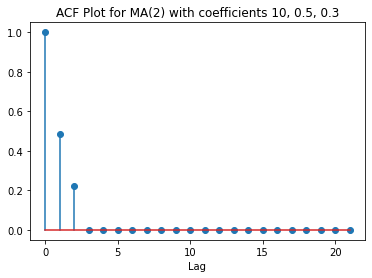

In [15]:
plt.stem(rho)
plt.title("ACF Plot for MA(2) with coefficients 10, 0.5, 0.3")
plt.xlabel("Lag")
plt.show()

### Generating 150, 200, 250 values from MA(2), plotting simulated data and its ACF

In [16]:
sim_ma_3 = ArmaProcess([1], [1,0.5,0.3]).generate_sample(nsample=150)
sim_ma_3=sim_ma_3+[10]*150

In [17]:
sim_ma_4 = ArmaProcess([1], [1,0.5,0.3]).generate_sample(nsample=200)
sim_ma_4=sim_ma_4+[10]*200

In [18]:
sim_ma_5 = ArmaProcess([1], [1,0.5,0.3]).generate_sample(nsample=250)
sim_ma_5=sim_ma_5+[10]*250

In [19]:
pd.DataFrame(sim_ma_5).to_csv('MA(2) Data.csv')

### Comparing the simulated data from both MA(2) processes and comparing their ACF

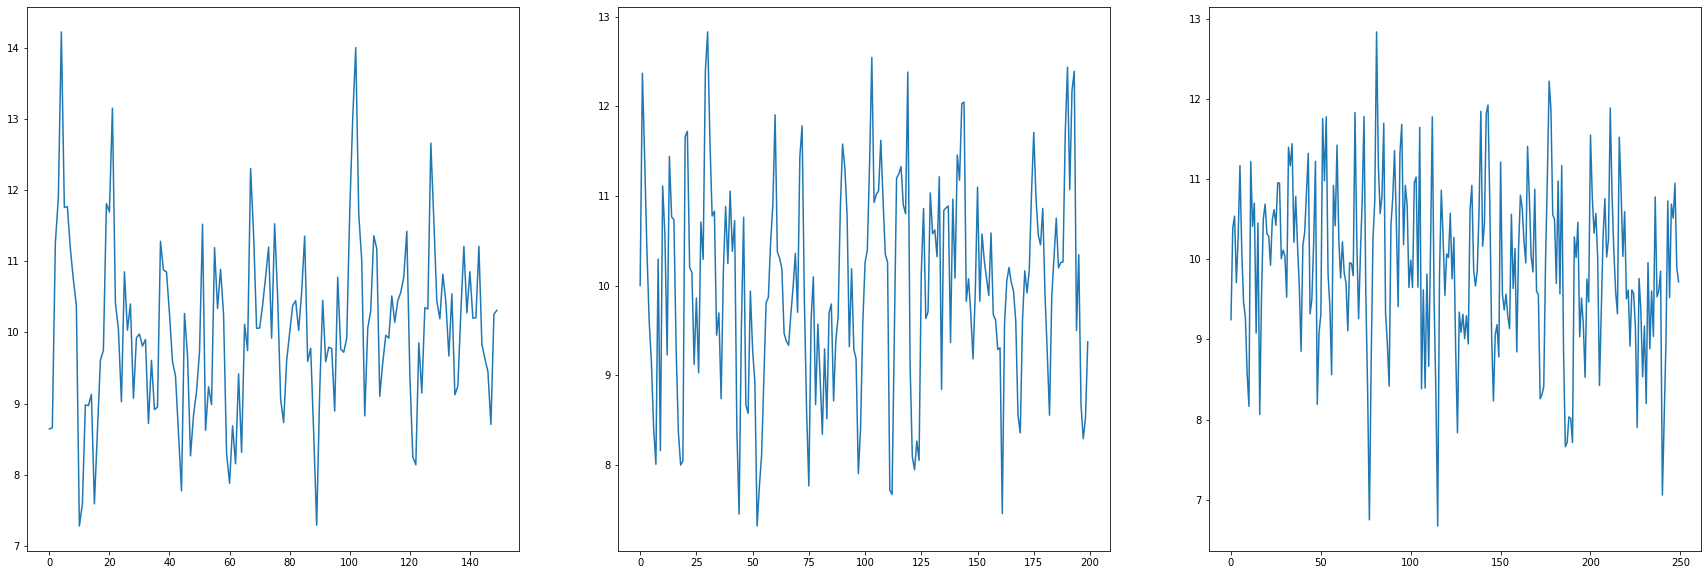

In [20]:
fig, axs = plt.subplots(1, 3,figsize=(30,10))
axs[0].plot(sim_ma_3)
axs[1].plot(sim_ma_4)
axs[2].plot(sim_ma_5)
plt.show()

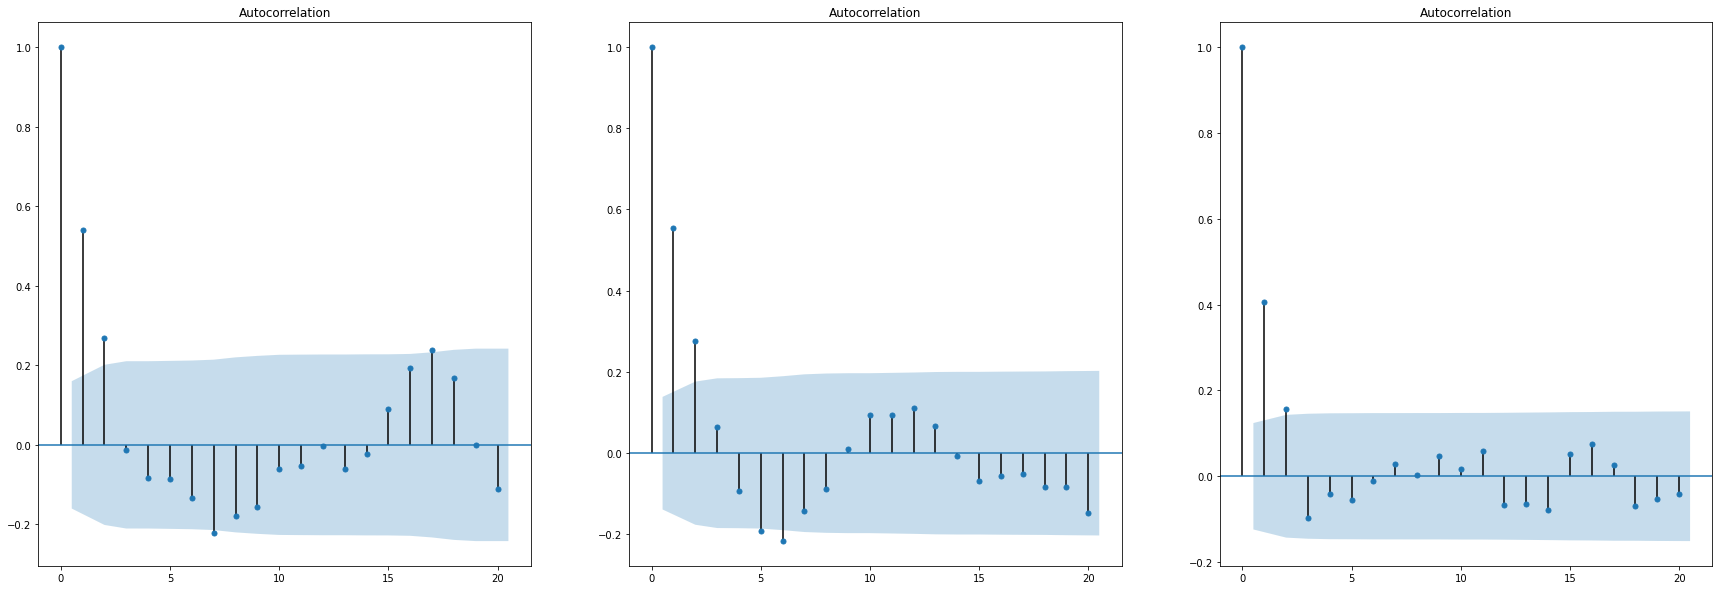

In [21]:
fig, ax = plt.subplots(1,3,figsize=(30,10))
sm.graphics.tsa.plot_acf(sim_ma_3, lags=20, ax=ax[0])
sm.graphics.tsa.plot_acf(sim_ma_4, lags=20, ax=ax[1])
sm.graphics.tsa.plot_acf(sim_ma_5, lags=20, ax=ax[2])
plt.show()

## 3) Features of the graph

- There is no recognisable trend or seasonality in the graph. 
- The series appears to move up and down. The horizontal line drawn at quakes = 20.2 indicates the mean of the series. Note that the series tends to stay on the same side of the mean (above or below) for a while and then moves to the other side.
- There are no detectable outliers.
- From the plot, it can't be concluded if the variance is constant.

## 4) AR(1) model:
$x_t=9.19+0.543 x_{t-1}$

### Simulating 99 data points from AR(1) model: 


In [42]:
sim_ar = ArmaProcess([1,-0.543], [1]).generate_sample(nsample=99)
sim_ar=sim_ar+[9.19]*99

In [43]:
pd.DataFrame(sim_ar).to_csv('AR(1) Data.csv')

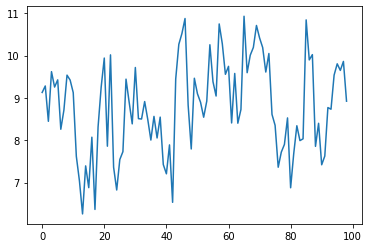

In [44]:
plt.plot(sim_ar)

### Fitting AR(1) model to simulated data

In [45]:
mod = ARMA(sim_ar, order=(1, 0))
res = mod.fit()

print(res.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   99
Model:                     ARMA(1, 0)   Log Likelihood                -132.713
Method:                       css-mle   S.D. of innovations              0.923
Date:                Thu, 23 Feb 2023   AIC                            271.426
Time:                        10:01:34   BIC                            279.212
Sample:                             0   HQIC                           274.576
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8021      0.197     44.609      0.000       8.415       9.189
ar.L1.y        0.5352      0.084      6.382      0.000       0.371       0.700
                                    Roots           

The coefficient at lag 1 is 0.5352, which is significantly different from 0 at alpha=0.05

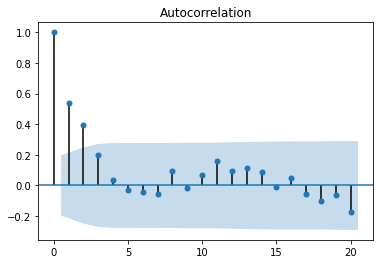

In [46]:
# ACF Plot
p=plot_acf(sim_ar, lags=20,alpha=0.05)
p.show()

Theoretically, $rho_i = \phi^i$ , $i=0,1,2,..$ where $\phi$ is the coefficient at lag 1. The graph agrees with the same. But after 2 lags, it doesn't remain significantly different from 0 at 5% los. The autocorrelation exponentially decays to 0 as lag increases.